# Polynomial Regression

## Introduction

https://www.analyticsvidhya.com/blog/2021/10/understanding-polynomial-regression-model/

https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/

https://www.javatpoint.com/machine-learning-polynomial-regression

## Content

1. <a href = "#1.-Polynomial-Regression">Polynomial Regression</a>
2. <a href = "#2.-Types-of-Polynomial-Regression">Types of Polynomial Regression</a>
3. <a href = "#3.-Linear-Regression-Vs-Polynomial-Regression">Linear Regression Vs Polynomial Regression</a>
4. <a href = "#4.-Overfitting-Vs-Under-fitting">Overfitting Vs Under-fitting</a>
5. <a href = "#5.-Bias-Vs-Variance-Tradeoff">Bias Vs Variance Tradeoff</a>
6. <a href = "#6.-Loss-and-Cost-function">Loss and Cost function</a>
7. <a href = "#7.-Gradient-Descent">Gradient Descent</a>
8. <a href = "#8.-Application">Application</a>
9. <a href = "#9.-Advantage-and-Disadvantage">Advantage and Disadvantage</a>

### Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
import operator
import pandas as pd

## 1. Polynomial Regression

In polynomial regression, the relationship between the independent variable x and the dependent variable y is described as an nth degree polynomial in x. Polynomial regression, abbreviated E(y |x), describes the fitting of a nonlinear relationship between the value of x and the conditional mean of y. It usually corresponded to the least-squares method. According to the Gauss Markov Theorem, the least square approach minimizes the variance of the coefficients. This is a type of Linear Regression in which the dependent and independent variables have a curvilinear relationship and the polynomial equation is fitted to the data; we’ll go over that in more detail later in the article. Machine learning is also referred to as a subset of Multiple Linear Regression. Because we convert the Multiple Linear Regression equation into a Polynomial Regression equation by including more polynomial elements.
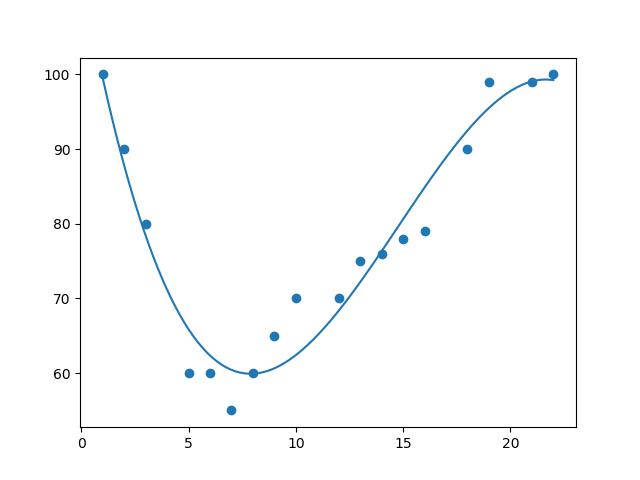

**Need for Polynomial Regression:**
>The need of Polynomial Regression in ML can be understood in the below points:
- If we apply a linear model on a linear dataset, then it provides us a good result as we have seen in Simple Linear Regression, but if we apply the same model without any modification on a non-linear dataset, then it will produce a drastic output. Due to which loss function will increase, the error rate will be high, and accuracy will be decreased.
- So for such cases, where data points are arranged in a non-linear fashion, we need the Polynomial Regression model. We can understand it in a better way using the below comparison diagram of the linear dataset and non-linear dataset.
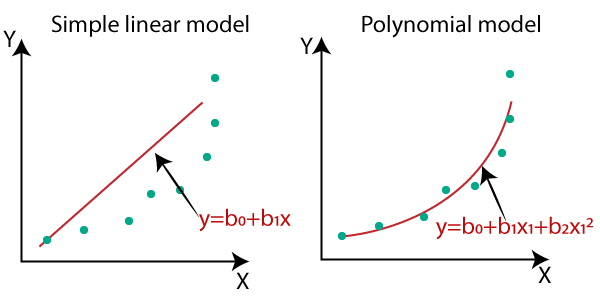
- In the above image, we have taken a dataset which is arranged non-linearly. So if we try to cover it with a linear model, then we can clearly see that it hardly covers any data point. On the other hand, a curve is suitable to cover most of the data points, which is of the Polynomial model.
- Hence, if the datasets are arranged in a non-linear fashion, then we should use the Polynomial Regression model instead of Simple Linear Regression.

[<a href="#Content">Back to Content</a>]

## 2. Types of Polynomial Regression

A quadratic equation is a general term for a second-degree polynomial equation. This degree, on the other hand, can go up to nth values. Polynomial regression can so be categorized as follows:
- 1. Linear – if degree as 1
- 2. Quadratic – if degree as 2
- 3. Cubic – if degree as 3 and goes on, on the basis of degree.
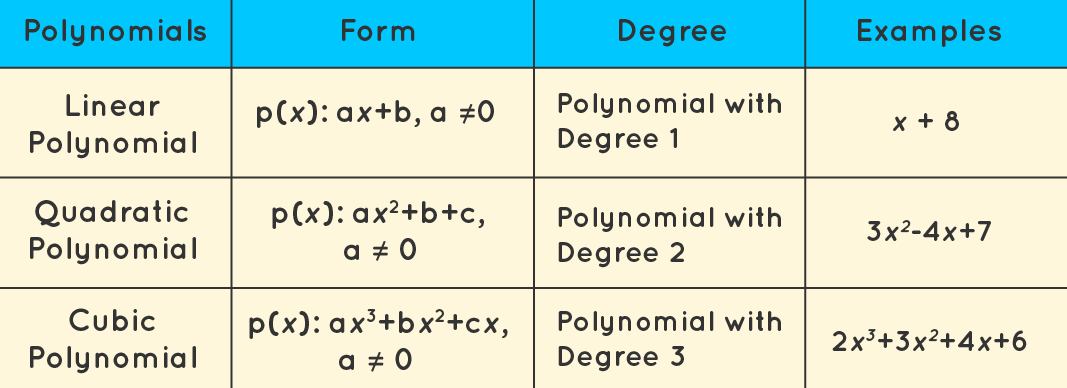

Assumption of Polynomial Regression
>We cannot process all of the datasets and use polynomial regression machine learning to make a better judgment. We can still do it, but there should be specific constraints for the dataset in order to get the best polynomial regression results.A dependent variable’s behaviour can be described by a linear, or curved, an additive link between the dependent variable and a set of k independent factors.The independent variables have no relationship with one another.We’re utilizing datasets with independent errors that are normally distributed with a mean of zero and a constant variance.

Simple math to understand Polynomial Regression
>Here we are dealing with mathematics, rather than going deep, just understand the basic structure, we all know the equation of a linear equation will be a straight line, from that if we have many features then we opt for multiple regression just increasing features part alone, then how about polynomial, it’s not about increasing but changing the structure to a quadratic equation, you can visually understand from the diagram
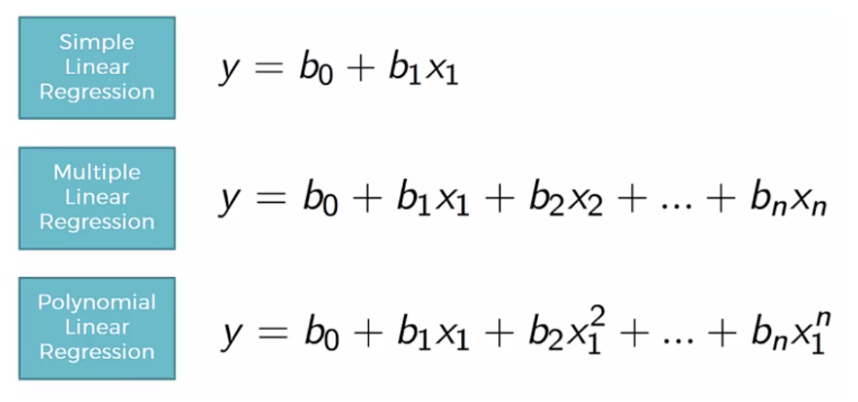

[<a href="#Content">Back to Content</a>]

## 3. Linear Regression Vs Polynomial Regression

Rather than focusing on the distinctions between linear and polynomial regression, we may comprehend the importance of polynomial regression by starting with linear regression. We build our model and realize that it performs abysmally. We examine the difference between the actual value and the best fit line we predicted, and it appears that the true value has a curve on the graph, but our line is nowhere near cutting the mean of the points. This is where polynomial regression comes into play; it predicts the best-fit line that matches the pattern of the data (curve).

One important distinction between Linear and Polynomial Regression is that Polynomial Regression does not require a linear relationship between the independent and dependent variables in the data set. When the Linear Regression Model fails to capture the points in the data and the Linear Regression fails to adequately represent the optimum conclusion, Polynomial Regression is used.
Before delving into the topic, let us first understand why we prefer Polynomial Regression over Linear Regression in some situations, say the non-linear condition of the dataset, by programming and visualization.

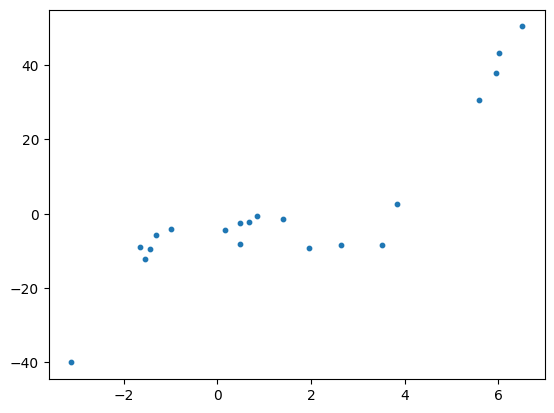

In [2]:
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

>We do regression analysis, in particular, Linear Regression, and see how well our random data gets analyzed perfectly

In [3]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]
model = LinearRegression()
model.fit(x, y)

LinearRegression()

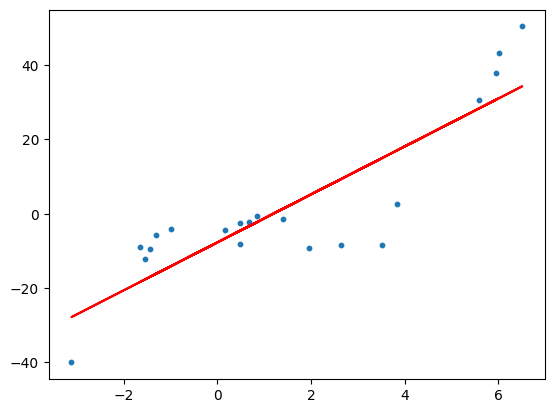

In [4]:
y_pred = model.predict(x)
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()

>The straight line is unable to capture the patterns in the data, as can be seen. This is an example of under-fitting.
Let’s look at it from a technical standpoint, using measures like Root Mean Square Error (RMSE) and discrimination coefficient (R2). The RMSE indicates how well a regression model can predict the response variable’s value in absolute terms, whereas the R2 indicates how well a model can predict the response variable’s value in percentage terms.

In [5]:
mse = metrics.mean_squared_error(x,y)
rmse = np.sqrt(mse) 
r2 = metrics.r2_score(x,y)
print('RMSE value:',rmse)
print('R2 value:',r2)

RMSE value: 18.850658705442495
R2 value: -43.16804198917641


>We need to enhance the model’s complexity to overcome under-fitting. In this sense, we need to make linear analyzes in a non-linear way, statistically by using Polynomial.Because the weights associated with the features are still linear, this is still called a linear model. x2 (x square) is only a function. However, the curve we’re trying to fit is quadratic in nature.

In [6]:
#degree=2
polynomial_features1 = PolynomialFeatures(degree=2)
x_poly1 = polynomial_features1.fit_transform(x)
model1 = LinearRegression()
model1.fit(x_poly1, y)
y_poly_pred1 = model1.predict(x_poly1)

In [7]:
rmse1 = np.sqrt(metrics.mean_squared_error(y,y_poly_pred1))
r21 = metrics.r2_score(y,y_poly_pred1)
print(rmse1)
print(r21)

9.52829036634937
0.7987435104030589


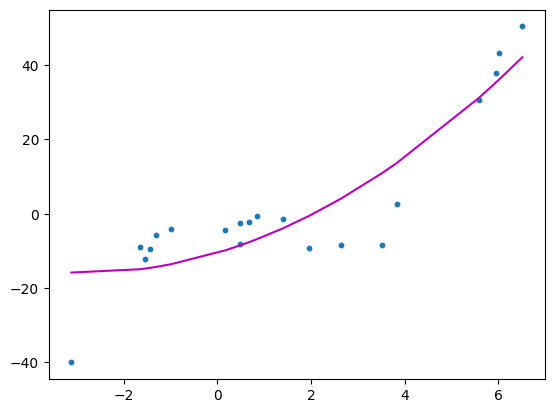

In [8]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred1), key=sort_axis)
x, y_poly_pred1 = zip(*sorted_zip)
plt.plot(x, y_poly_pred1, color='m')
plt.show()

In [9]:
#degree=3
polynomial_features2= PolynomialFeatures(degree=3)
x_poly2 = polynomial_features2.fit_transform(x)
model2 = LinearRegression()
model2.fit(x_poly2, y)
y_poly_pred2 = model2.predict(x_poly2)

In [10]:
rmse2 = np.sqrt(metrics.mean_squared_error(y,y_poly_pred2))
r22 = metrics.r2_score(y,y_poly_pred2)
print(rmse2)
print(r22)

19.583657992662552
0.14982651040334083


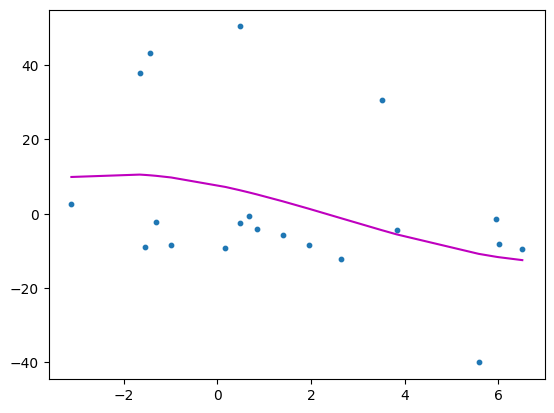

In [11]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred2), key=sort_axis)
x, y_poly_pred2 = zip(*sorted_zip)
plt.plot(x, y_poly_pred2, color='m')
plt.show()

In [12]:
#degree=4
polynomial_features3= PolynomialFeatures(degree=4)
x_poly3 = polynomial_features3.fit_transform(x)
model3 = LinearRegression()
model3.fit(x_poly3, y)
y_poly_pred3 = model3.predict(x_poly3)

In [13]:
rmse3 = np.sqrt(metrics.mean_squared_error(y,y_poly_pred3))
r23 = metrics.r2_score(y,y_poly_pred3)
print(rmse3)
print(r23)

19.510893251711153
0.15613255657622993


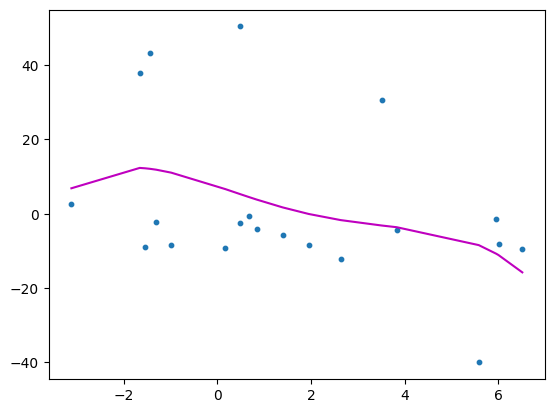

In [14]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred3), key=sort_axis)
x, y_poly_pred3 = zip(*sorted_zip)
plt.plot(x, y_poly_pred3, color='m')
plt.show()

[<a href="#Content">Back to Content</a>]

## 4. Overfitting Vs Under-fitting

We keep on increasing the degree, we will see the best result, but there comes the over-fitting problem, if we get r2 value for a particular value shows 100.

When analyzing a dataset linearly, we encounter an under-fitting problem, which can be corrected using polynomial regression. However, when fine-tuning the degree parameter to the optimal value, we encounter an over-fitting problem, resulting in a 100 per cent r2 value. The conclusion is that we must avoid both overfitting and underfitting issues.

Note: To avoid over-fitting, we can increase the number of training samples so that the algorithm does not learn the system’s noise and becomes more generalized.

[<a href="#Content">Back to Content</a>]

## 5. Bias Vs Variance Tradeoff

How do we pick the best model? To address this question, we must first comprehend the trade-off between bias and variance.

The mistake caused by the model’s simple assumptions in fitting the data is referred to as bias. A high bias indicates that the model is unable to capture data patterns, resulting in under-fitting.

The mistake caused by the complicated model trying to match the data is referred to as variance. When a model has a high variance, it passes over the majority of the data points, causing the data to overfit.

From the above program, when degree is 1 which means in linear regression, it shows underfitting which means high bias and low variance. And when we get r2 value 100, which means low bias and high variance, which means overfitting

As the model complexity grows, the bias reduces while the variance increases, and vice versa. A machine learning model should, in theory, have minimal variance and bias. However, having both is nearly impossible. As a result, a trade-off must be made in order to build a strong model that performs well on both train and unseen data.
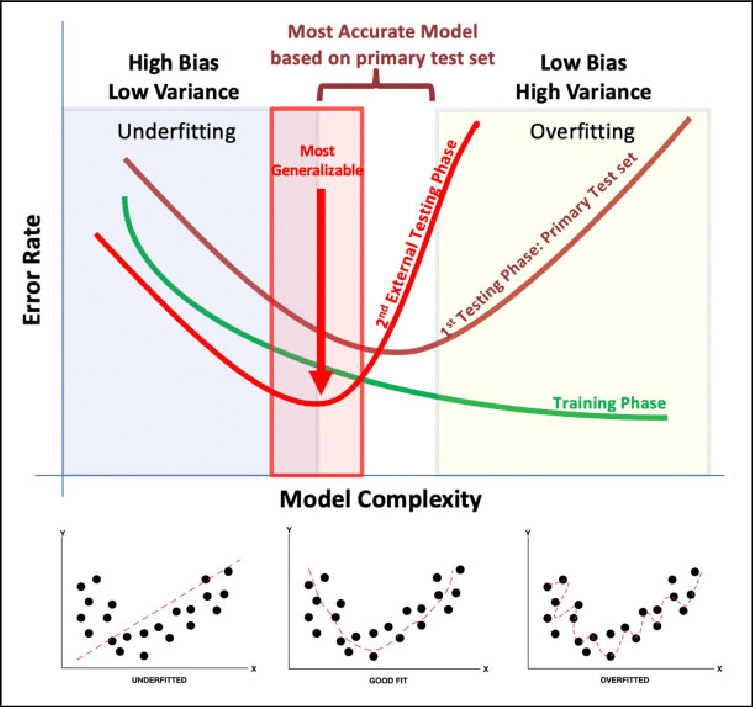

Degree – how to find the right one?
>We need to find the right degree of polynomial parameter, in order to avoid overfitting and underfitting problems,
- 1. Forward selection: increase the degree parameter till you get the optimal result
- 2. Backward selection: decrease degree parameter till you get optimal

[<a href="#Content">Back to Content</a>]

## 6. Loss and Cost function

The Cost Function is a function that evaluates a Machine Learning model’s performance for a given set of data. The Cost Function is a single real number that calculates the difference between anticipated and expected values. Many people are confused by the differences between the Cost Function and the Loss Function. To put it another way, the Cost Function is the average of the n-sample error in the data, whereas the Loss Function is the error for individual data points. To put it another way, the Loss Function refers to a single training example, whereas the Cost Function refers to the complete training set.

The Mean Squared Error may also be used as the Cost Function of Polynomial regression; however, the equation will vary somewhat.
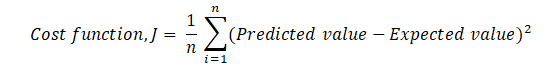
We now know that the Cost Function’s optimum value is 0 or a close approximation to 0. To get an optimal Cost Function, we may use Gradient Descent, which changes the weight and, as a result, reduces mistakes.

[<a href="#Content">Back to Content</a>]

## 7. Gradient Descent

Gradient descent is a method of determining the values of a function’s parameters (coefficients) in order to minimize a cost function (cost). It may be used to decrease the Cost function (minimizing MSE value) and achieve the best fit line.

The values of slope (m) and slope-intercept (b) will be set to 0 at the start of the function, and the learning rate (α) will be introduced. The learning rate (α) is set to an extremely low number, perhaps between 0.01 and 0.0001. The learning rate is a tuning parameter in an optimization algorithm that sets the step size at each iteration as it moves toward the cost function’s minimum. The partial derivative is then determined in terms of m for the cost function equation, as well as derivatives with regard to the b.
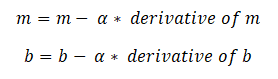
With the aid of the following equation, they and b are updated once the derivatives are determined. m and b’s derivatives are derived above and are α.

Gradient indicates the steepest climb of the loss function, but the steepest fall is the inverse of the gradient, which is why the gradient is subtracted from the weights (m and b). The process of updating the values of m and b continues until the cost function achieves or approaches the ideal value of 0. The current values of m and b will be the best fit line’s optimal value.

[<a href="#Content">Back to Content</a>]

## 8. Application

This equation is used to obtain the results in various experimental techniques. The independent and dependent variables have a well-defined connection. It’s used to figure out what isotopes are present in sediments. It’s utilized to look at the spread of various illnesses across a population. It’s utilized to research how synthesis is created.These are basically used to define or describe non-linear phenomena such as: 
- The growth rate of tissues.
- Progression of disease epidemics
- Distribution of carbon isotopes in lake sediments

[<a href="#Content">Back to Content</a>]

## 9. Advantage and Disadvantage

Advantages:
- A broad range of functions can be fit under it.
- Polynomial basically fits a wide range of curvatures.
- Polynomial provides the best approximation of the relationship between dependent and independent variables.

Disadvantages:
- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of nonlinear analysis.
- In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

[<a href="#Content">Back to Content</a>]

In [ ]:
#tested:no errors